In [6]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm
import numpy as np

#pm.help()

# Cargar y preparar el DataFrame df_jo
df_jo = pm.df('df_jo')  # Cargar el DataFrame desde 'payments_manager'
df_jo.info()  # Ver información básica sobre el DataFrame

# Ordenar el DataFrame df_jo por la columna 'id_cr' y resetear índices
df_jo = df_jo.sort_values(by=["id_cr"]).reset_index(drop=True)

# Crear una copia del DataFrame para su posterior uso
df_jo_cp = df_jo.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32092 entries, 0 to 32091
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32092 non-null  int64          
 1   id_fe                       32092 non-null  int64          
 2   fe_cr_id                    21055 non-null  float64        
 3   user_id                     32092 non-null  int64          
 4   active                      32092 non-null  int64          
 5   created_at                  32092 non-null  datetime64[ns] 
 6   created_at_fe               21055 non-null  datetime64[ns] 
 7   amount                      32092 non-null  float64        
 8   fee                         32092 non-null  float64        
 9   stat_cr                     32092 non-null  object         
 10  stat_fe                     32092 non-null  object         
 11  transfer_type               32092 non-nul

In [10]:
# Convertir las columnas 'created_at' y 'moderated_at' a datetime
df_jo_cp['created_at'] = pd.to_datetime(df_jo_cp['created_at'])
df_jo_cp['moderated_at'] = pd.to_datetime(df_jo_cp['moderated_at'])


# Agrupar los datos por fecha 'created_at' y calcular las cantidades
result = df_jo_cp.groupby(pd.Grouper(key='created_at', freq='W')).apply(
    lambda x: pd.Series({
        'unique_id_cr': x['id_cr'].nunique(),  # Contar los 'id_cr' únicos
        'unique_id_cr_with_moderated_at': x['id_cr'][x['moderated_at'].notna()].nunique(),  # 'id_cr' con moderación
        'unique_id_cr_need_manual_check_moderated': x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique(),  # 'id_cr' que necesitan revisión manual y están moderados
        'unique_id_cr_need_manual_check': x['id_cr'][(x['needs_m_check_recov'] == 1)].nunique(),  # 'id_cr' que necesitan revisión manual
        'difference_in_manual_check': x['id_cr'][(x['needs_m_check_recov'] == 1)].nunique() - 
                                      x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique(),  # Diferencia en las revisiones manuales
        'efficiency_of_moderated_at': (
            x['id_cr'][(x['moderated_at'].notna()) & (x['needs_m_check_recov'] == 1)].nunique() / 
            x['id_cr'][x['moderated_at'].notna()].nunique() * 100  if x['id_cr'][x['moderated_at'].notna()].nunique() > 0 else 0
        ),  # Eficiencia de 'moderated_at'
    }),
    include_groups=False  # Excluir las columnas de agrupación
).reset_index()

# Renombrar las columnas para que coincidan con la salida esperada
result.rename(columns={'created_at': 'date'}, inplace=True)

# Calcular el porcentaje de revisión manual (unique_id_cr_with_moderated_at / unique_id_cr)
result['manual_check_percentage'] = (result['unique_id_cr_with_moderated_at'] / result['unique_id_cr']) * 100

result




,date,unique_id_cr,unique_id_cr_with_moderated_at,unique_id_cr_need_manual_check_moderated,unique_id_cr_need_manual_check,difference_in_manual_check,efficiency_of_moderated_at,manual_check_percentage
0,2019-11-24,1.0,1.0,1.0,1.0,0.0,100.000000,100.000000
1,2019-12-01,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
2,2019-12-08,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
3,2019-12-15,106.0,106.0,52.0,52.0,0.0,49.056604,100.000000
4,2019-12-22,119.0,119.0,66.0,66.0,0.0,55.462185,100.000000
5,2019-12-29,48.0,48.0,24.0,24.0,0.0,50.000000,100.000000
6,2020-01-05,37.0,37.0,19.0,19.0,0.0,51.351351,100.000000
7,2020-01-12,60.0,60.0,36.0,36.0,0.0,60.000000,100.000000
8,2020-01-19,38.0,38.0,23.0,23.0,0.0,60.526316,100.000000
9,2020-01-26,31.0,31.0,23.0,23.0,0.0,74.193548,100.000000


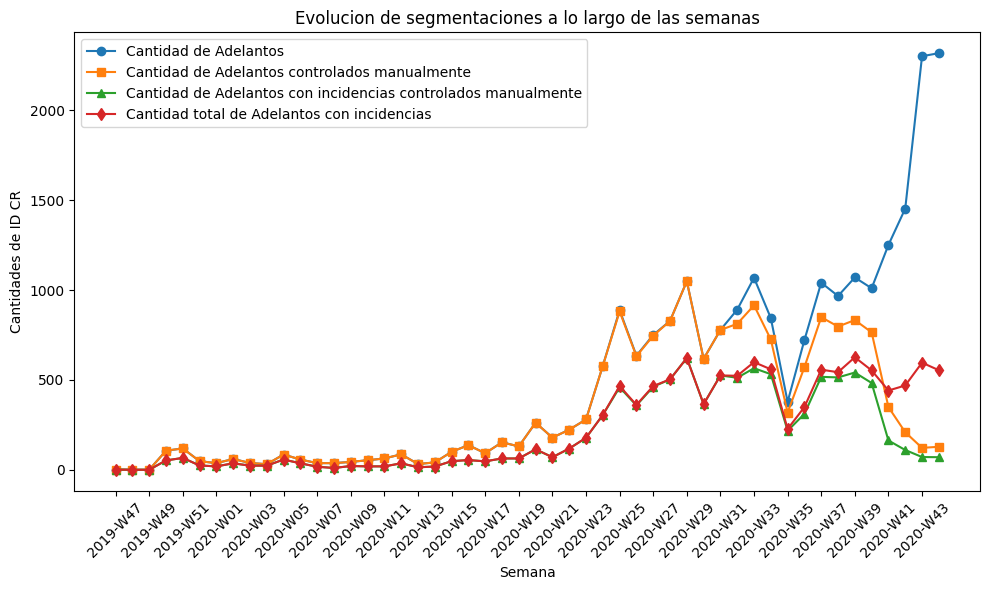

In [12]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar las diferentes series a lo largo del tiempo (semanas)
plt.plot(result['date'], result['unique_id_cr'], label='Cantidad de Adelantos', marker='o')
plt.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Cantidad de Adelantos controlados manualmente', marker='s')
plt.plot(result['date'], result['unique_id_cr_need_manual_check_moderated'], label='Cantidad de Adelantos con incidencias controlados manualmente', marker='^')
plt.plot(result['date'], result['unique_id_cr_need_manual_check'], label='Cantidad total de Adelantos con incidencias', marker='d')

# Formatear el eje x para mostrar el número de la semana y el año
week_labels = result['date'].dt.strftime('%Y-W%U')  # Formato 'Año-Semana'

# Seleccionar solo cada 2da semana para mostrar en el eje x
step = 2
plt.xticks(ticks=result['date'][::step], labels=week_labels[::step], rotation=45)

# Agregar etiquetas y título
plt.xlabel('Semana')
plt.ylabel('Cantidades de ID CR')
plt.title('Evolucion de segmentaciones a lo largo de las semanas')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()



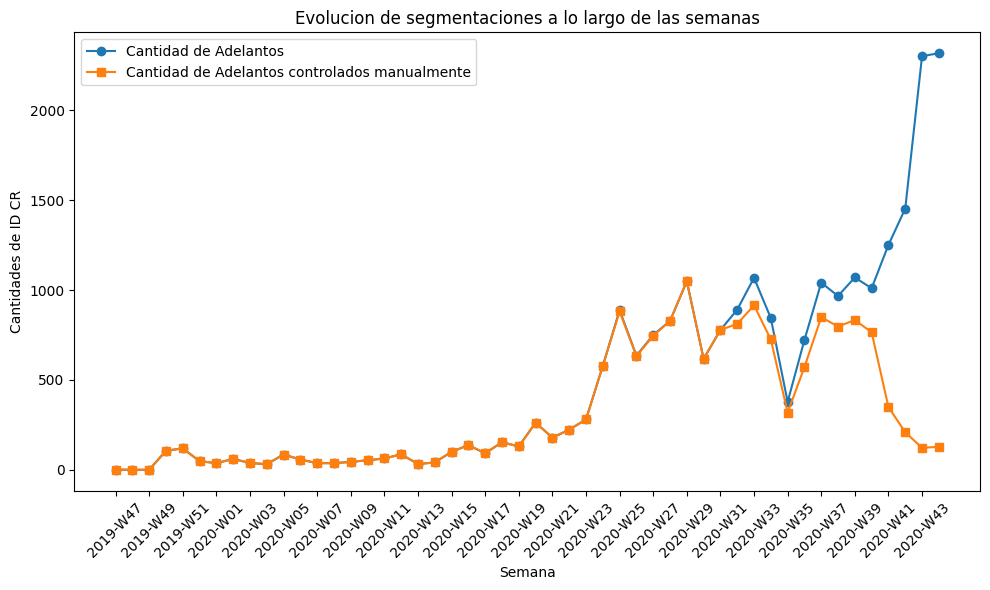

In [14]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar las diferentes series a lo largo del tiempo (semanas)
plt.plot(result['date'], result['unique_id_cr'], label='Cantidad de Adelantos', marker='o', color='tab:blue')
plt.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Cantidad de Adelantos controlados manualmente', marker='s', color='tab:orange')

# Formatear el eje x para mostrar el número de la semana y el año
week_labels = result['date'].dt.strftime('%Y-W%U')  # Formato 'Año-Semana'

# Seleccionar solo cada 2da semana para mostrar en el eje x
step = 2
plt.xticks(ticks=result['date'][::step], labels=week_labels[::step], rotation=45)

# Agregar etiquetas y título
plt.xlabel('Semana')
plt.ylabel('Cantidades de ID CR')
plt.title('Evolucion de segmentaciones a lo largo de las semanas')

# Agregar una leyenda
plt.legend()

# Ajustar la distribución para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()



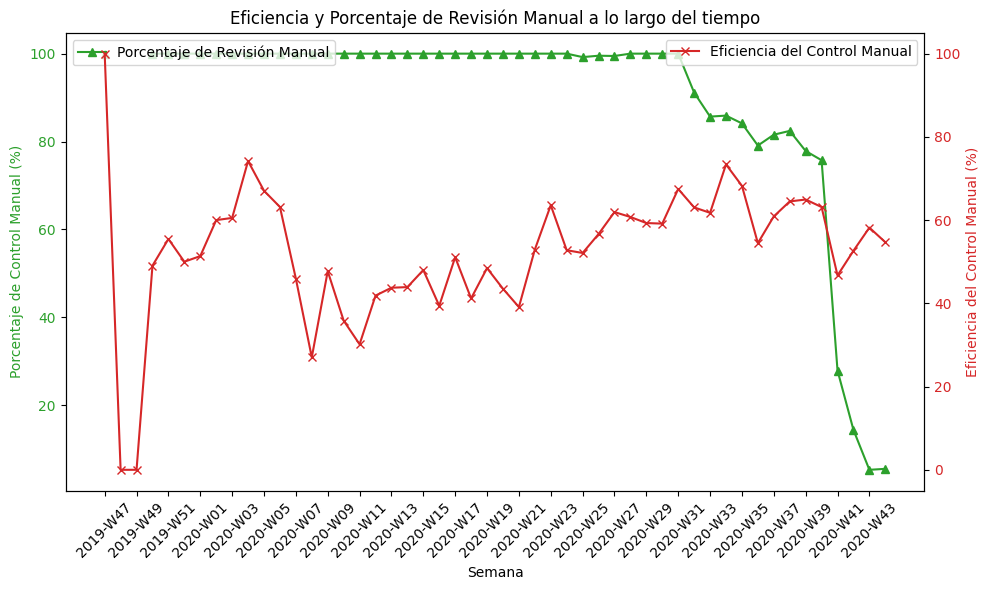

In [15]:
# Crear la figura y el primer eje (ax1)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar el porcentaje de revisión manual en el primer eje (ax1)
ax1.plot(result['date'], result['manual_check_percentage'], label='Porcentaje de Revisión Manual', marker='^', color='tab:green')

# Formatear el eje x para mostrar el número de la semana y el año
week_labels = result['date'].dt.strftime('%Y-W%U')  # Formato 'Año-Semana'

# Seleccionar solo cada 2da semana para mostrar en el eje x
step = 2
plt.xticks(ticks=result['date'][::step], labels=week_labels[::step], rotation=45)

# Agregar etiquetas y título para el primer eje y
ax1.set_xlabel('Semana')
ax1.set_ylabel('Porcentaje de Control Manual (%)', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Crear un segundo eje y para graficar la métrica de eficiencia
ax2 = ax1.twinx()

# Graficar la eficiencia de Moderated At en el segundo eje (ax2)
ax2.plot(result['date'], result['efficiency_of_moderated_at'], label='Eficiencia del Control Manual', marker='x', color='tab:red')

# Agregar etiquetas para el segundo eje y
ax2.set_ylabel('Eficiencia del Control Manual (%)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar título y leyenda
plt.title('Eficiencia y Porcentaje de Revisión Manual a lo largo del tiempo')
fig.tight_layout()

# Rotar las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Mostrar las leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()




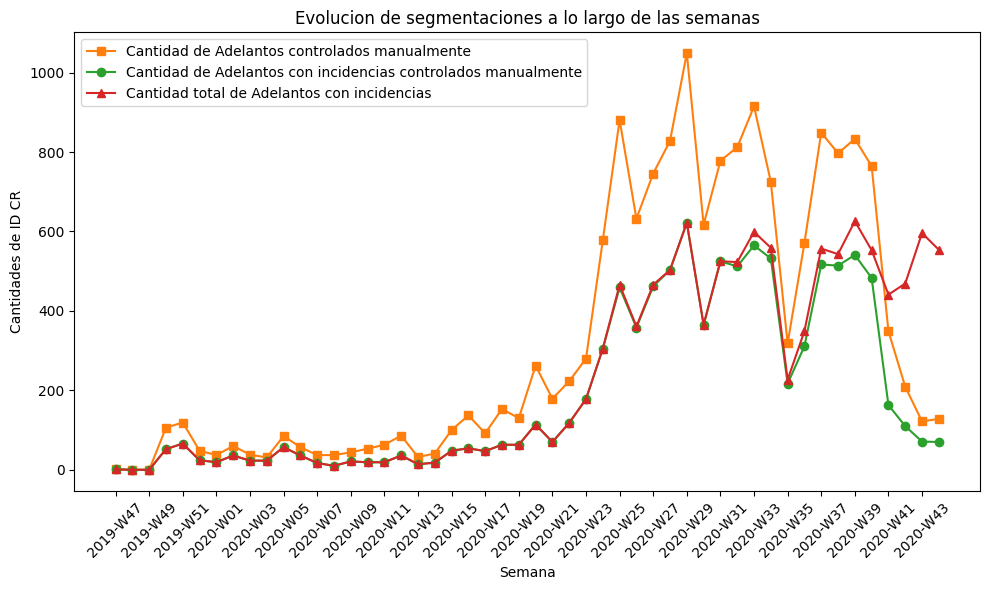

In [16]:
# Crear la figura y el eje (ax)
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las tres métricas en el mismo eje
ax.plot(result['date'], result['unique_id_cr_with_moderated_at'], label='Cantidad de Adelantos controlados manualmente', marker='s', color='tab:orange')
ax.plot(result['date'], result['unique_id_cr_need_manual_check_moderated'], label='Cantidad de Adelantos con incidencias controlados manualmente', marker='o', color='tab:green')
ax.plot(result['date'], result['unique_id_cr_need_manual_check'], label='Cantidad total de Adelantos con incidencias', marker='^', color='tab:red')

# Formatear el eje x para mostrar el número de la semana y el año
week_labels = result['date'].dt.strftime('%Y-W%U')  # Formato 'Año-Semana'

# Seleccionar solo cada 2da semana para mostrar en el eje x
step = 2
plt.xticks(ticks=result['date'][::step], labels=week_labels[::step], rotation=45)

# Agregar etiquetas y título
ax.set_xlabel('Semana')
plt.ylabel('Cantidades de ID CR')
plt.title('Evolucion de segmentaciones a lo largo de las semanas')

# Rotar las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Agregar leyenda
ax.legend()

# Ajustar la distribución para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()



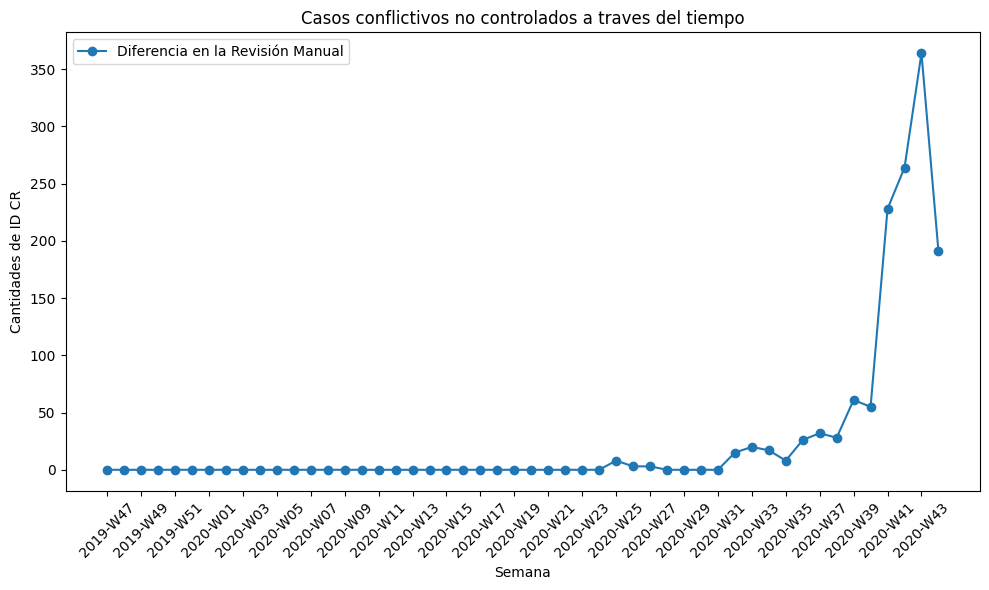

In [273]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar la diferencia en la revisión manual a lo largo del tiempo
plt.plot(result['date'], result['difference_in_manual_check'], label='Diferencia en la Revisión Manual', marker='o', color='tab:blue')

# Formatear el eje x para mostrar el número de la semana y el año
week_labels = result['date'].dt.strftime('%Y-W%U')  # Formato 'Año-Semana'

# Seleccionar solo cada 2da semana para mostrar en el eje x
step = 2
plt.xticks(ticks=result['date'][::step], labels=week_labels[::step], rotation=45)

# Agregar etiquetas y título
plt.xlabel('Semana')
plt.ylabel('Cantidades de ID CR')
plt.title('Casos conflictivos no controlados a traves del tiempo')

# Rotar las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Ajustar la distribución para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()
